In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_test.shape

(10000, 28, 28)

In [18]:
X_train[0].shape

(28, 28)

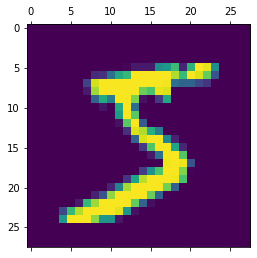

In [19]:
plt.matshow(X_train[0])

In [21]:
y_train[0]

5

In [23]:
#normalizing
X_train = X_train / 255
X_test = X_test / 255

In [25]:
#reshaping
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [27]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [28]:
#CNN  model building
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2374 - accuracy: 0.9293
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2229 - accuracy: 0.9335
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2101 - accuracy: 0.9372
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1993 - accuracy: 0.9408
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1898 - accuracy: 0.9433
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1809 - accuracy: 0.9459
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1733 - accuracy: 0.9482: 0s - loss: 0.174
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1653 - accuracy: 0.9504
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1553 - accuracy: 0.9529


[0.1553208976984024, 0.9528999924659729]

In [34]:
y_pred=model.predict(X_test)

In [37]:
y_pred[:5]

array([[5.4317202e-02, 9.4455645e-06, 7.2837645e-01, 9.8345274e-01,
        9.9754950e-05, 3.1974309e-03, 1.0788369e-08, 9.9999094e-01,
        1.0530994e-01, 1.5778883e-01],
       [4.8373248e-03, 9.9078149e-01, 9.9998462e-01, 9.9258524e-01,
        1.3388079e-07, 8.5336971e-01, 6.6128331e-03, 6.2188468e-09,
        8.3345103e-01, 6.7731696e-07],
       [1.3685485e-02, 9.9418443e-01, 2.6932684e-01, 2.7211644e-02,
        8.1646508e-03, 1.8269435e-02, 5.0023753e-02, 2.7444211e-01,
        2.2646496e-01, 1.2770214e-02],
       [9.9989140e-01, 1.1356597e-07, 5.8402129e-02, 5.4653984e-02,
        7.6264660e-03, 1.3440731e-01, 5.0450188e-01, 3.6993447e-01,
        4.0495135e-02, 9.0664583e-01],
       [1.5528770e-02, 4.7131677e-04, 4.5180392e-02, 1.9803774e-03,
        9.9882561e-01, 3.2707745e-01, 1.0117070e-01, 2.1736942e-01,
        3.1046867e-01, 9.5379686e-01]], dtype=float32)

In [38]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [39]:
from sklearn.metrics import classification_report
print("classification report:\n",classification_report(y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.97      0.95      0.96      1032
           3       0.94      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.93      0.94       892
           6       0.96      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.91      0.95      0.93       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

